In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [2]:
# encoding = "cp1252"
# encoding = "ISO-8859-1" 
# or engine=python
# df = pd.read_csv('Ecom.csv', encoding="cp1252")
# df.head()

# Data Cleaning

In [3]:
df = pd.read_csv('ecom_utf8.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Fill missing CustomerID with the most frequent CustomerID for each InvoiceNo

In [6]:
df['CustomerID'] = df.groupby('InvoiceNo')['CustomerID']\
                    .transform(lambda x: x.mode().iat[0] if not x.mode().empty else x)

### Fill missing Description with the most frequent Description for each StockCode

In [7]:
df['Description'] = df.groupby('StockCode')['Description']\
                    .transform(lambda x: x.mode().iat[0] if not x.mode().empty else x)

In [8]:
df.query('UnitPrice == 0.0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,CHRISTMAS CRAFT HEART STOCKING,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NEW ENGLAND MUG W GIFT BOX,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,27,12/8/2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,CACTI T-LIGHT CANDLES,20,12/8/2011 14:06,0.0,NaN,United Kingdom


### Fill missing UnitPrice with the most frequent UnitPrice for each StockCode

In [9]:
df['UnitPrice'] = df.groupby('StockCode')['UnitPrice']\
                    .transform(lambda x: x.mode().iat[0] if not x.mode().empty else x)

In [10]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541797 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Convert CustomerID to str

In [12]:
df['CustomerID'].astype('Int32').astype('str')

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 541909, dtype: object

In [13]:
df['CustomerID'] = df['CustomerID'].astype('Int32').astype('str')

### Convert InvoiceDate to datetime

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.95,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.75,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,4.15,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.75,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,4.25,17850,United Kingdom


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541797 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [18]:
df.isna().sum()

InvoiceNo        0
StockCode        0
Description    112
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
dtype: int64

#### Cleanup Description 

In [19]:
df['Description'] = df['Description'].fillna(value='')

In [20]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Add Year, Month, Day, and Hour columns

In [26]:
df.insert(loc=5,column='InvoiceHour',value=df['InvoiceDate'].dt.hour)

In [28]:
df.insert(loc=5,column='InvoiceDay',value=df['InvoiceDate'].dt.day)

In [29]:
df.insert(loc=5,column='InvoiceMonth',value=df['InvoiceDate'].dt.month)

In [31]:
df.insert(loc=5,column='InvoiceYear',value=df['InvoiceDate'].dt.year)

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010,12,1,8,2.95,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010,12,1,8,3.75,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010,12,1,8,4.15,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010,12,1,8,3.75,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010,12,1,8,4.25,17850,United Kingdom


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   541909 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   InvoiceYear   541909 non-null  int32         
 6   InvoiceMonth  541909 non-null  int32         
 7   InvoiceDay    541909 non-null  int32         
 8   InvoiceHour   541909 non-null  int32         
 9   UnitPrice     541909 non-null  float64       
 10  CustomerID    541909 non-null  object        
 11  Country       541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(4), int64(1), object(5)
memory usage: 41.3+ MB


### Adding a sales column

In [34]:
df.insert(loc=10,column='Sales',value=df['Quantity'] * df['UnitPrice'])

In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,UnitPrice,Sales,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010,12,1,8,2.95,17.7,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010,12,1,8,3.75,22.5,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010,12,1,8,4.15,33.2,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010,12,1,8,3.75,22.5,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010,12,1,8,4.25,25.5,17850,United Kingdom


# Exploratory Data Analysis

## Q1. Analyze sales by Country.

In [41]:
df.pivot_table(index='Country', aggfunc={'Sales':'sum'}).round(0)

,Sales
Country,
Australia,158227.0
Austria,9701.0
Bahrain,548.0
Belgium,42204.0
Brazil,1248.0
Canada,3245.0
Channel Islands,20829.0
Cyprus,13429.0
Czech Republic,719.0


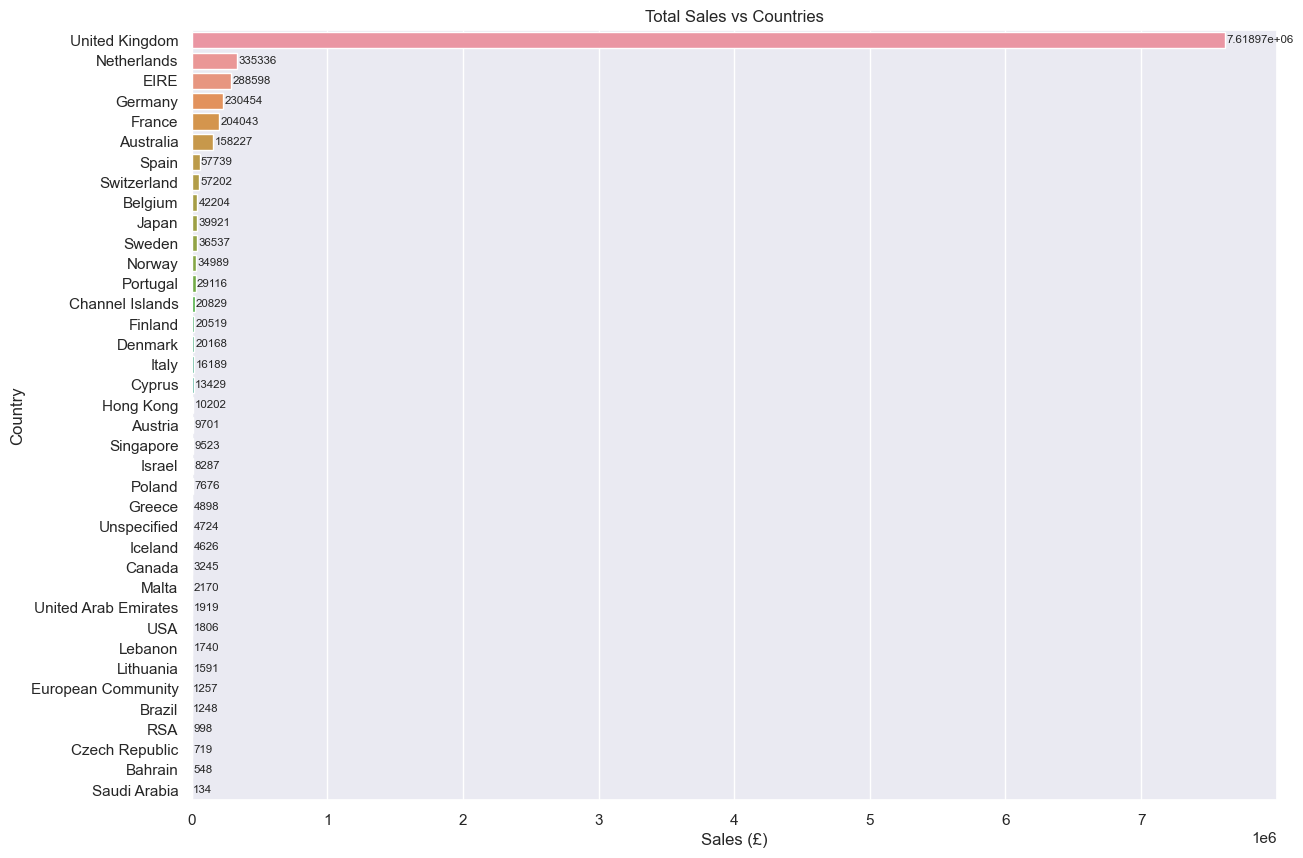

In [64]:
total_sales = df.pivot_table(index='Country', aggfunc={'Sales':'sum'})\
                    .sort_values('Sales', ascending=False)\
                    .reset_index()\
                    .round(0)

fig = plt.figure(figsize=(14,10))
ax = sns.barplot(y='Country', x='Sales', data=total_sales)
plt.title('Total Sales vs Countries', fontsize='medium')
plt.xlabel('Sales (£)')
ax.bar_label(ax.containers[0], padding=1, fontsize='x-small')
plt.show();

**We see that United Kingdom is a clear outlier**

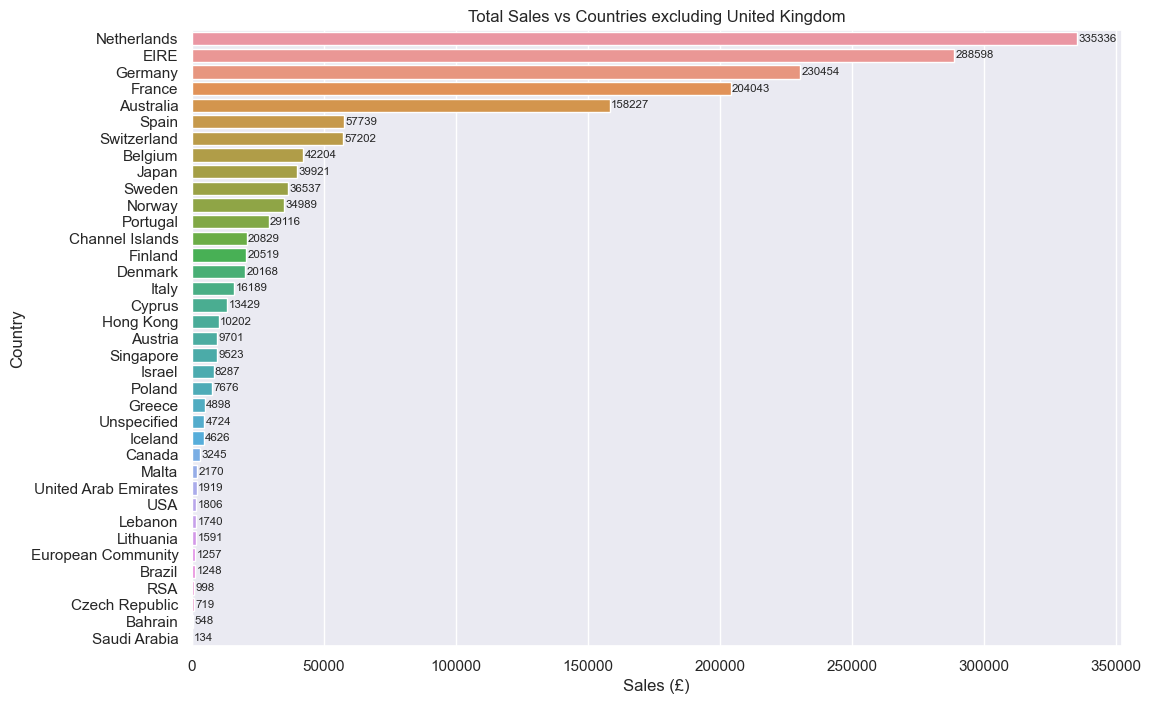

In [51]:
fig = plt.figure(figsize=(12,8))
ax = sns.barplot(y='Country', x='Sales', data=total_sales.query('Country != "United Kingdom"'))
plt.title('Total Sales vs Countries excluding United Kingdom')
ax.bar_label(ax.containers[0], padding=1, fontsize='x-small')
plt.xlabel('Sales (£)')
plt.show();

##### Top 5 in sales excluding UK

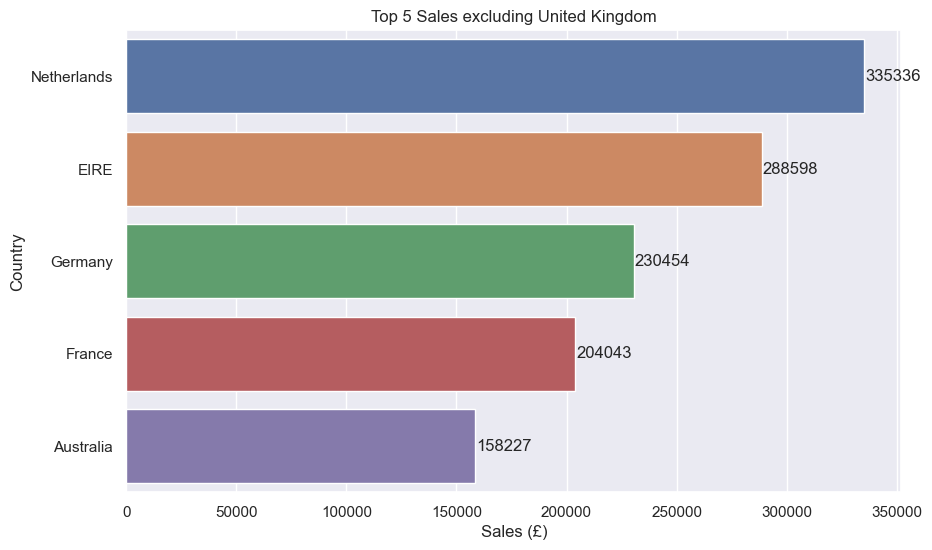

In [60]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(y='Country', x='Sales', data=total_sales.query('Country != "United Kingdom"').nlargest(n=5,columns='Sales'))
plt.title('Top 5 Sales excluding United Kingdom')
ax.bar_label(ax.containers[0], padding=1)
plt.xlabel('Sales (£)')
plt.show();

##### Bottom 5 in sales

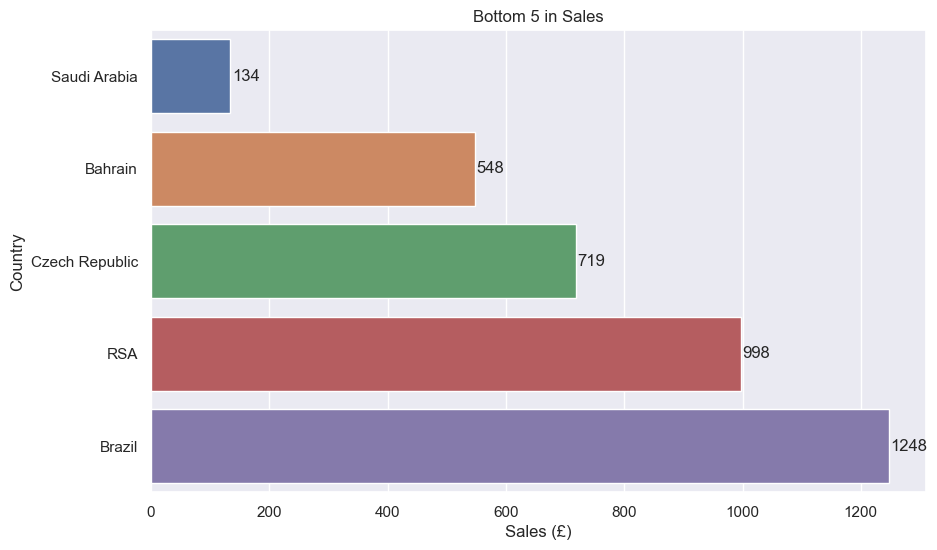

In [61]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(y='Country', x='Sales', 
                     data=total_sales.query('Country != "United Kingdom"')\
                    .nsmallest(n=5,columns='Sales')\
                    .sort_values('Sales')
                )
                
plt.title('Bottom 5 in Sales')
ax.bar_label(ax.containers[0], padding=1)
plt.xlabel('Sales (£)')
plt.show();

In [130]:
# Sales analysis
sales_status = df[['Country', 'Sales']]
sales_status.loc[:, ['Status']] = df['Sales'].transform(lambda x: "Purchase" if x >= 0 else "Returns")

In [131]:
sales_status.loc[:, ['Sales']] = sales_status['Sales'].apply(np.abs)

In [132]:
sales_status

,Country,Sales,Status
0,United Kingdom,17.70,Purchase
1,United Kingdom,22.50,Purchase
2,United Kingdom,33.20,Purchase
3,United Kingdom,22.50,Purchase
4,United Kingdom,25.50,Purchase
...,...,...,...
541904,France,10.20,Purchase
541905,France,12.60,Purchase
541906,France,16.60,Purchase
541907,France,16.60,Purchase


#### Purchase and Returns in UK

In [136]:
sales_status.groupby(['Country', 'Status'])['Sales'].sum()

Country               Status  
Australia             Purchase     159541.010
                      Returns        1314.170
Austria               Purchase       9745.240
                      Returns          44.360
Bahrain               Purchase        777.900
                                     ...     
USA                   Returns        1841.070
United Arab Emirates  Purchase       1918.780
United Kingdom        Purchase    8970121.804
                      Returns     1351150.060
Unspecified           Purchase       4724.430
Name: Sales, Length: 68, dtype: float64

In [138]:
grouped = sales_status.groupby(['Country', 'Status'])['Sales'].sum().reset_index()
grouped

,Country,Status,Sales
0,Australia,Purchase,159541.010
1,Australia,Returns,1314.170
2,Austria,Purchase,9745.240
3,Austria,Returns,44.360
4,Bahrain,Purchase,777.900
...,...,...,...
63,USA,Returns,1841.070
64,United Arab Emirates,Purchase,1918.780
65,United Kingdom,Purchase,8970121.804
66,United Kingdom,Returns,1351150.060


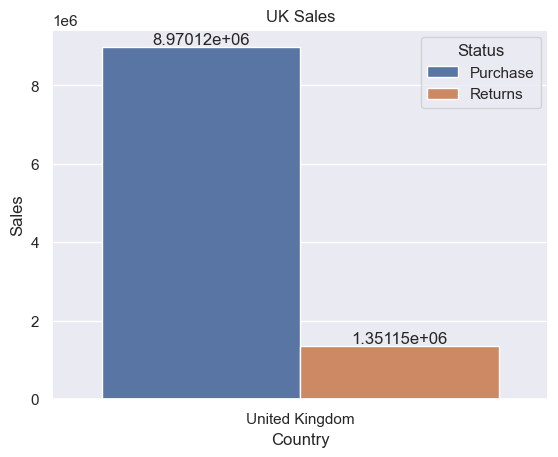

In [147]:

ax = sns.barplot(x='Country', y='Sales', hue='Status', data=grouped.query('Country == "United Kingdom"'))
plt.title('UK Sales')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show();


### Purchase and Returns in top 5 other countries

In [149]:
top_5_purchase = grouped.query('Status == "Purchase" & Country != "United Kingdom"')\
                    .nlargest(5, columns='Sales')['Country']

In [150]:
top_5_purchase

43    Netherlands
18           EIRE
26        Germany
24         France
0       Australia
Name: Country, dtype: object

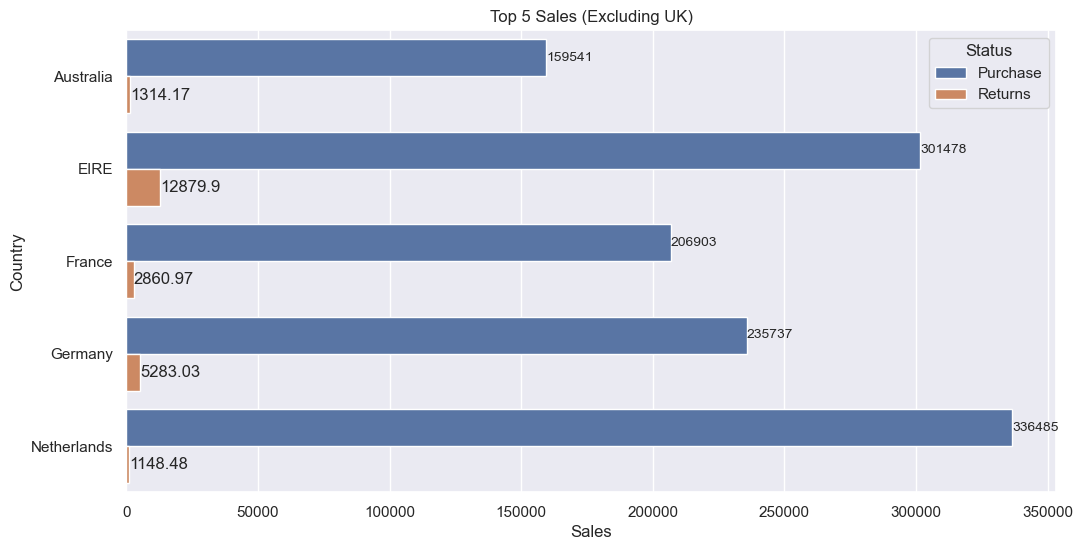

In [159]:
fig = plt.figure(figsize=(12,6))
ax = sns.barplot(y='Country', x='Sales', hue='Status', 
                 data=grouped.query('Country.isin(@top_5_purchase)'))
plt.title('Top 5 Sales (Excluding UK)')
ax.bar_label(ax.containers[0], fontsize='small')
ax.bar_label(ax.containers[1])
plt.show();


### Purchase and Returns in bottom 5 countries

In [160]:
bottom_5_purchase = grouped.query('Status == "Purchase"')\
                    .nsmallest(5, columns='Sales')['Country']

In [161]:
bottom_5_purchase

52      Saudi Arabia
4            Bahrain
14    Czech Republic
51               RSA
8             Brazil
Name: Country, dtype: object

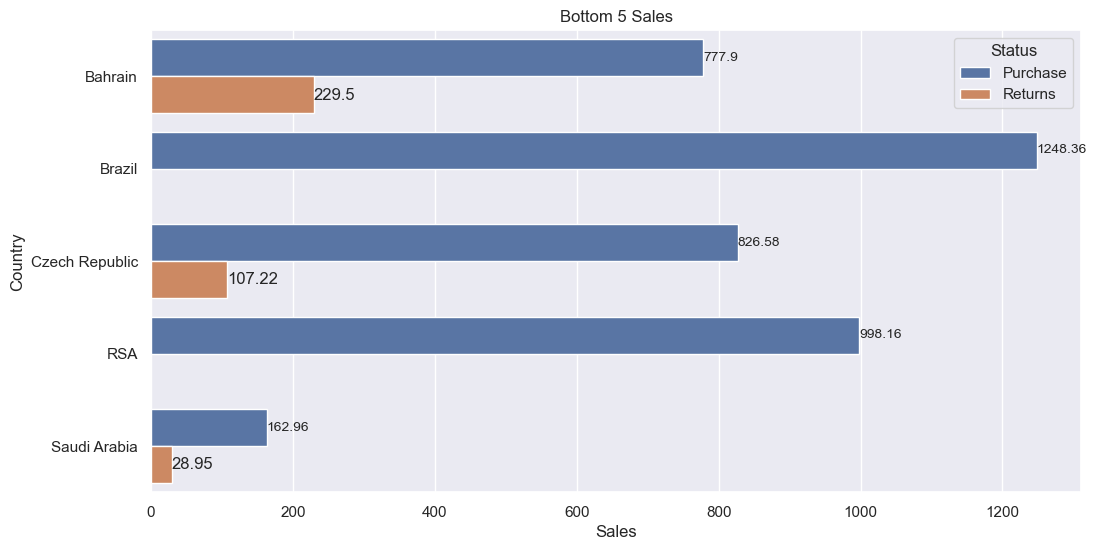

In [162]:
fig = plt.figure(figsize=(12,6))
ax = sns.barplot(y='Country', x='Sales', hue='Status', 
                 data=grouped.query('Country.isin(@bottom_5_purchase)'))
plt.title('Bottom 5 Sales')
ax.bar_label(ax.containers[0], fontsize='small')
ax.bar_label(ax.containers[1])
plt.show();


### Net sales and returns

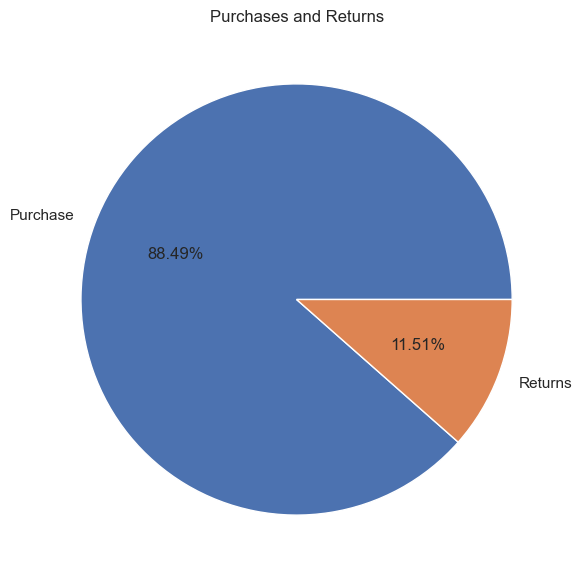

In [169]:
fig = plt.figure(figsize=(7,7))
data = [sales_status.query('Status == "Purchase"')['Sales'].sum(),
        sales_status.query('Status == "Returns"')['Sales'].sum()
       ]
labels = "Purchase", "Returns"
plt.pie(data, labels=labels, autopct="%.2f%%")
plt.title('Purchases and Returns')
plt.show();

In [170]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,UnitPrice,Sales,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010,12,1,8,2.95,17.7,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010,12,1,8,3.75,22.5,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010,12,1,8,4.15,33.2,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010,12,1,8,3.75,22.5,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010,12,1,8,4.25,25.5,17850,United Kingdom


### Counting unique orders from different Country

In [175]:
unique_orders = df.groupby('Country')['InvoiceNo']\
                    .nunique()\
                    .sort_values(ascending=False)\
                    .reset_index()
unique_orders

,Country,InvoiceNo
0,United Kingdom,23494
1,Germany,603
2,France,461
3,EIRE,360
4,Belgium,119
5,Spain,105
6,Netherlands,101
7,Switzerland,74
8,Portugal,71
9,Australia,69


### Q. What percentage of total orders were returns?

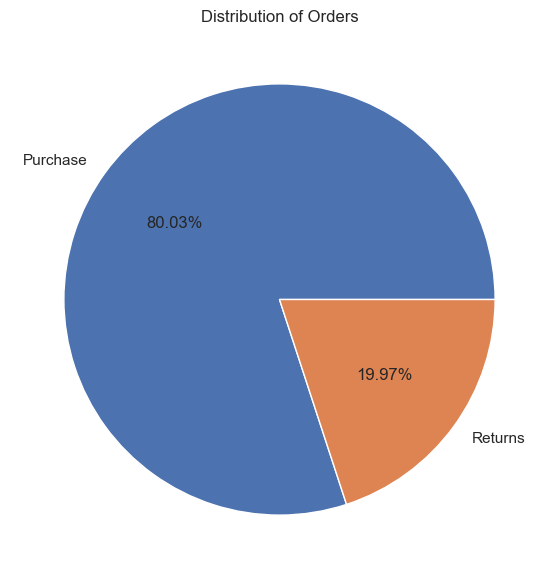

In [179]:
fig = plt.figure(figsize=(7,7))
data = [df.query('Quantity > 0')['InvoiceNo'].nunique(),
        df.query('Quantity < 0')['InvoiceNo'].nunique()
       ]
labels = "Purchase", "Returns"
plt.pie(data, labels=labels, autopct="%.2f%%")
plt.title('Distribution of Orders')
plt.show();

### Q. During what period of time did the sales pick or slump down?

In [189]:
time_series = df[['InvoiceDate', 'Sales']]
time_series.set_index('InvoiceDate', inplace=True)


In [191]:
monthly_sales = time_series.resample('M').sum()

In [192]:
monthly_sales

,Sales
InvoiceDate,
2010-12-31,657888.340
2011-01-31,592128.940
2011-02-28,479443.560
2011-03-31,636428.600
2011-04-30,466594.401
2011-05-31,723992.730
2011-06-30,635412.910
2011-07-31,680419.761
2011-08-31,617216.990


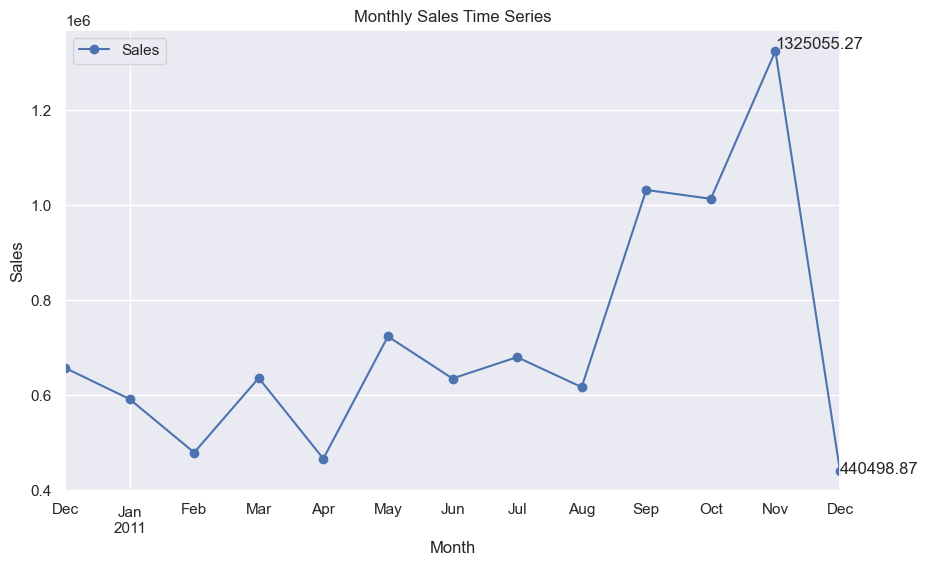

In [196]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', ax=plt.gca())
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Time Series')

# Find highest and lowest points
highest_point = monthly_sales['Sales'].idxmax()
lowest_point = monthly_sales['Sales'].idxmin()

# Annotate highest and lowest points
plt.annotate(monthly_sales['Sales'].max(), xy=(highest_point, monthly_sales['Sales'].max()),
             xytext=(highest_point, monthly_sales['Sales'].max() + 5000),
             )
plt.annotate(monthly_sales['Sales'].min(), xy=(lowest_point, monthly_sales['Sales'].min()),
             xytext=(lowest_point, monthly_sales['Sales'].min() - 5000)
             )

plt.grid(True)
plt.show();

It seems that the highest sales occur during the winter season, which has holidays such as Christmas, New Year etc

### Customers trends



In [202]:
first_purchase_dates = df.groupby('CustomerID')['InvoiceDate'].min()

first_purchase_dates.reset_index()

,CustomerID,InvoiceDate
0,12346,2011-01-18 10:01:00
1,12347,2010-12-07 14:57:00
2,12348,2010-12-16 19:09:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00
...,...,...
4368,18281,2011-06-12 10:53:00
4369,18282,2011-08-05 13:35:00
4370,18283,2011-01-06 14:14:00
4371,18287,2011-05-22 10:39:00


In [204]:
new_customers = first_purchase_dates.reset_index()\
                    .set_index('InvoiceDate')\
                    .resample('M').count()
new_customers

,CustomerID
InvoiceDate,
2010-12-31,949
2011-01-31,421
2011-02-28,380
2011-03-31,440
2011-04-30,299
2011-05-31,279
2011-06-30,235
2011-07-31,191
2011-08-31,167


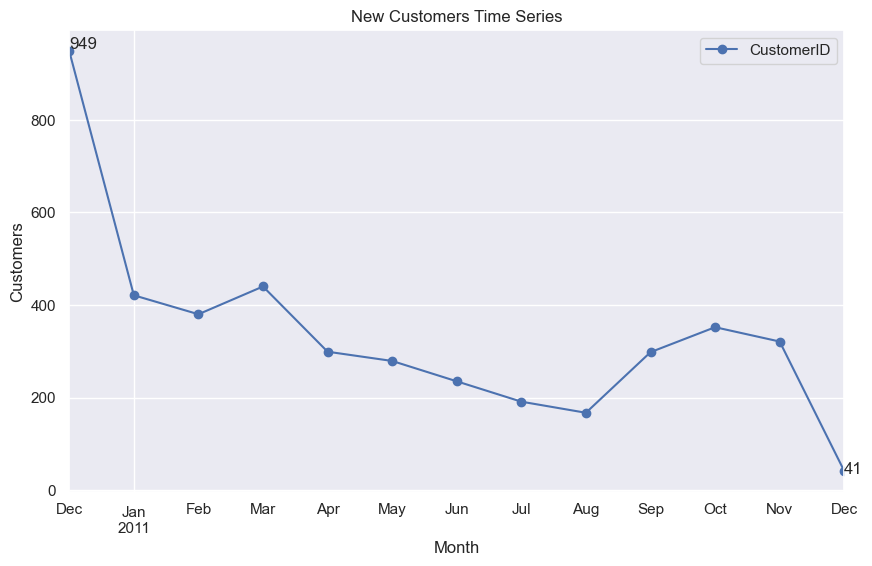

In [209]:
plt.figure(figsize=(10, 6))
new_customers.plot(marker='o', ax=plt.gca())
plt.xlabel('Month')
plt.ylabel('Customers')
plt.title('New Customers Time Series')

# Find highest and lowest points
highest_point = new_customers['CustomerID'].idxmax()
lowest_point = new_customers['CustomerID'].idxmin()

# Annotate highest and lowest points
plt.annotate(new_customers['CustomerID'].max(), xy=(highest_point, new_customers['CustomerID'].max()),
             xytext=(highest_point, new_customers['CustomerID'].max() + 5),
             )
plt.annotate(new_customers['CustomerID'].min(), xy=(lowest_point, new_customers['CustomerID'].min()),
             xytext=(lowest_point, new_customers['CustomerID'].min() - 5)
             )

plt.grid(True)
plt.show();

The number of customers have been falling rapidly, it picked up briefly during the summer and the winter holidays

### Analyze how we may advertise during the day to boost sales?

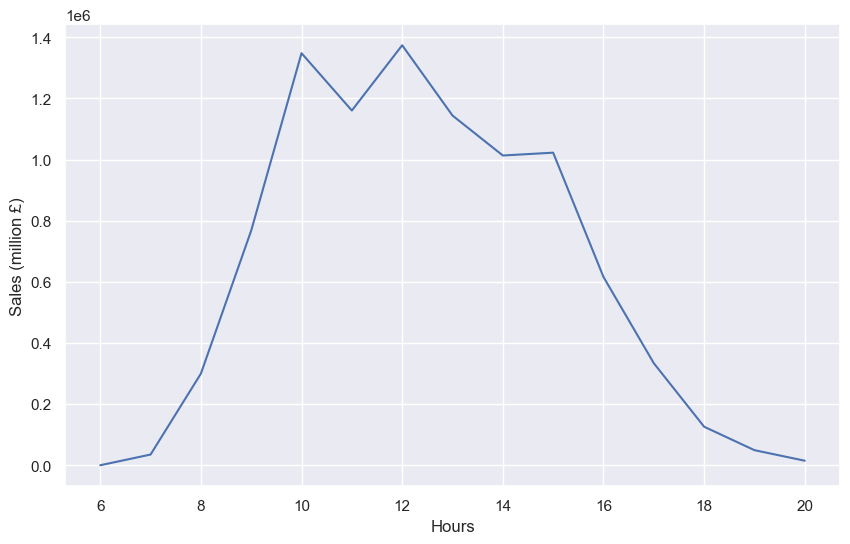

In [212]:
sales_hours = df.groupby('InvoiceHour')['Sales']\
                .sum()\
                .sort_index()
plt.figure(figsize=(10, 6))
sales_hours.plot()
plt.xlabel('Hours')
plt.ylabel('Sales (million £)')
plt.show();

It seems like sales peaked during the mornings and lunch hours

### Q. Which were the items that were bought together, and how frequently?

In [213]:
df[df['InvoiceNo'].duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,UnitPrice,Sales,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010,12,1,8,2.95,17.70,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010,12,1,8,3.75,22.50,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010,12,1,8,4.15,33.20,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010,12,1,8,3.75,22.50,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010,12,1,8,4.25,25.50,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,2011,12,9,12,0.85,10.20,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2011,12,9,12,2.10,12.60,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,2011,12,9,12,4.15,16.60,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,2011,12,9,12,4.15,16.60,12680,France


In [215]:
bought_together = df.query('InvoiceNo.duplicated(keep=False) & Quantity > 0')

In [216]:
bought_together = bought_together.groupby('InvoiceNo')['Description']\
                .agg(','.join)\
                .reset_index()
bought_together

,InvoiceNo,Description
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
1,536366,"HAND WARMER UNION JACK,HAND WARMER RED RETROSPOT"
2,536367,"ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUS..."
3,536368,"JAM MAKING SET WITH JARS,RED COAT RACK PARIS F..."
4,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
...,...,...
18349,581583,"LUNCH BAG RED RETROSPOT,6 CHOCOLATE LOVE HEART..."
18350,581584,"RED FLOCK LOVE HEART PHOTO FRAME,6 CHOCOLATE L..."
18351,581585,"BLACK TEA TOWEL CLASSIC DESIGN,ASSORTED BOTTLE..."
18352,581586,"LARGE CAKE STAND HANGING STRAWBERY,SET OF 3 H..."


#### Most commonly sold pair

In [217]:
from itertools import combinations
from collections import Counter

In [218]:

counter = Counter()

for row in bought_together['Description']:
    row_list = row.split(',')
    counter.update(Counter(combinations(row_list,2)))

In [219]:
counter.most_common(10)

[(('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 613),
 (('KEY FOB ', 'KEY FOB '), 559),
 (('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 542),
 (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  527),
 (('KEY FOB ', ' BACK DOOR '), 525),
 (('KEY FOB ', ' SHED'), 504),
 (('JUMBO SHOPPER VINTAGE RED PAISLEY', 'JUMBO BAG RED RETROSPOT'), 466),
 (('JUMBO BAG RED RETROSPOT', 'DOTCOM POSTAGE'), 461),
 (('JUMBO STORAGE BAG SUKI', 'JUMBO BAG RED RETROSPOT'), 455),
 (('COFFEE', 'SUGAR'), 453)]

#### Most commonly sold triplets

In [220]:
# counter = Counter()

# for row in bought_together['Description']:
#     row_list = row.split(',')
#     counter.update(Counter(combinations(row_list,3)))

# counter.most_common(10)
    

KeyboardInterrupt: 

### What are the favorite items in each country?

In [223]:
df.query('Quantity > 0').groupby(['Country', 'Description'])['Quantity'].sum()

Country      Description                  
Australia     DOLLY GIRL BEAKER               200
              I LOVE LONDON MINI BACKPACK       4
             10 COLOUR SPACEBOY PEN            48
             12 PENCIL SMALL TUBE WOODLAND    384
             12 PENCILS TALL TUBE POSY        252
                                             ... 
Unspecified  WRAP POPPIES  DESIGN              25
             WRAP SUKI AND FRIENDS             25
             WRAP VINTAGE LEAF DESIGN          25
             WRAP WEDDING DAY                  25
             ZINC METAL HEART DECORATION        2
Name: Quantity, Length: 19533, dtype: int64

In [230]:
df.query('Quantity > 0').groupby(['Country', 'Description'])['Quantity']\
                        .sum()\
                        .reset_index()\
                        .groupby('Country')\
                        .apply(lambda x: x.loc[x['Quantity'].idxmax()])\
                        .drop(columns='Country')\
                        .reset_index()\
                        .sort_values('Quantity', ascending=False)\
                        .reset_index()\
                        .drop(columns='index')

,Country,Description,Quantity
0,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995
1,Netherlands,RABBIT NIGHT LIGHT,4801
2,France,RABBIT NIGHT LIGHT,4024
3,Japan,RABBIT NIGHT LIGHT,3408
4,Australia,MINI PAINT SET VINTAGE,2952
5,Sweden,MINI PAINT SET VINTAGE,2916
6,EIRE,POPCORN HOLDER,1852
7,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,1233
8,Spain,CHILDRENS CUTLERY POLKADOT PINK,1089
9,Switzerland,PLASTERS IN TIN WOODLAND ANIMALS,639


In [246]:
df.groupby(['Country', 'Description'])\
            .agg({'Quantity':'sum', 'UnitPrice':'mean'})\
            .reset_index()\
            .groupby('Country')\
            .apply(lambda x: x.loc[x['Quantity'].idxmax()])\
            .drop(columns='Country')\
            .reset_index()\
            .sort_values('Quantity', ascending=False)\
            .reset_index()\
            .drop(columns='index')

,Country,Description,Quantity,UnitPrice
0,United Kingdom,POPCORN HOLDER,52928,0.85
1,Netherlands,RABBIT NIGHT LIGHT,4801,2.08
2,France,RABBIT NIGHT LIGHT,4023,2.08
3,Japan,RABBIT NIGHT LIGHT,3401,2.08
4,Australia,MINI PAINT SET VINTAGE,2916,0.65
5,Sweden,MINI PAINT SET VINTAGE,2916,0.65
6,EIRE,POPCORN HOLDER,1809,0.85
7,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,1218,2.95
8,Spain,CHILDRENS CUTLERY POLKADOT PINK,1089,4.15
9,Switzerland,PLASTERS IN TIN WOODLAND ANIMALS,639,1.65


### What items were sold the most?

In [254]:
pq_df = df.groupby(['StockCode', 'Description'])\
            .agg({'Quantity':'sum', 'UnitPrice':'mean', "Sales":"sum"})\
            .reset_index()\
            .nlargest(20,'Sales')\
            .reset_index()\
            .set_index('Description')
pq_df

,index,StockCode,Quantity,UnitPrice,Sales
Description,,,,,
REGENCY CAKESTAND 3 TIER,1348,22423,12980,12.75,165495.00
WHITE HANGING HEART T-LIGHT HOLDER,3536,85123A,38830,2.95,114548.50
POSTAGE,4062,POST,6353,18.00,114354.00
JUMBO BAG RED RETROSPOT,3515,85099B,47363,2.08,98515.04
PARTY BUNTING,2733,47566,18022,4.95,89208.90
RABBIT NIGHT LIGHT,1982,23084,30646,2.08,63743.68
ASSORTED COLOUR BIRD ORNAMENT,3305,84879,36221,1.69,61213.49
CHILLI LIGHTS,2924,79321,10343,5.75,59472.25
PAPER CHAIN KIT 50'S CHRISTMAS,1043,22086,18902,2.95,55760.90


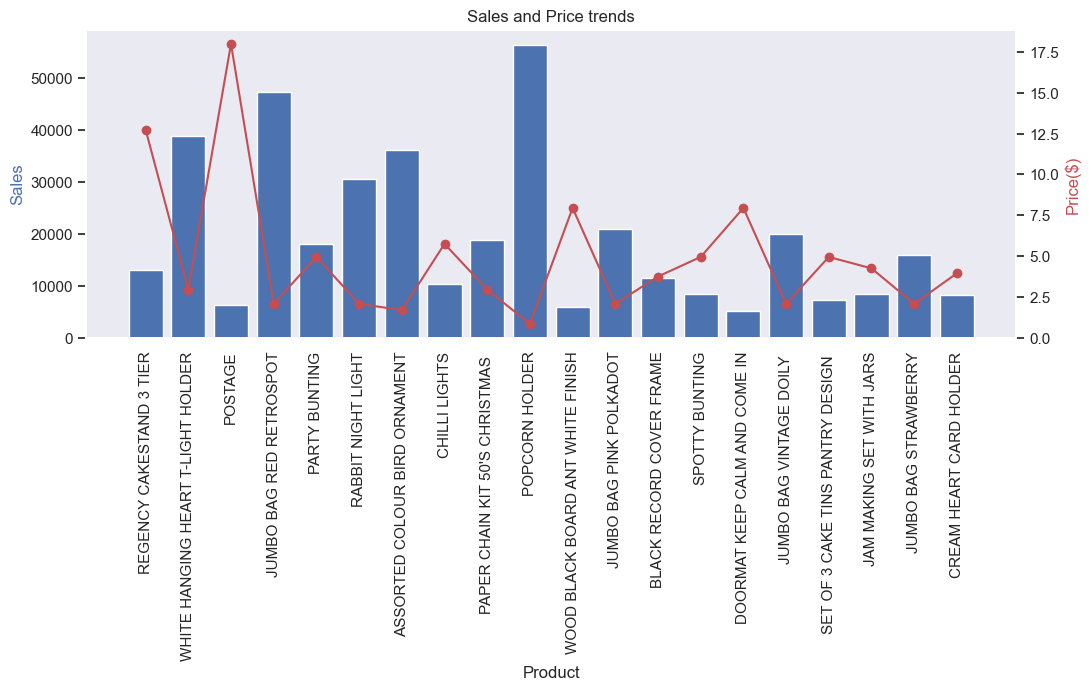

In [260]:
fig, ax1 = plt.subplots(figsize=(12,4))
ax2 = ax1.twinx()
ax1.bar(pq_df.index, pq_df['Quantity'])
ax2.plot(pq_df.index, pq_df['UnitPrice'], 'o-', color="r")
ax1.grid(False)
ax2.grid(False)
ax1.tick_params(axis='x', rotation=90)
plt.title('Sales and Price trends')
ax1.set_xlabel('Product')
ax1.set_ylabel('Sales', color='b')
ax2.set_ylabel('Price($)', color='r')
plt.show();

The trends show that product with lower prices sell more, but rarely bring in much revenue

### Products with highest sales

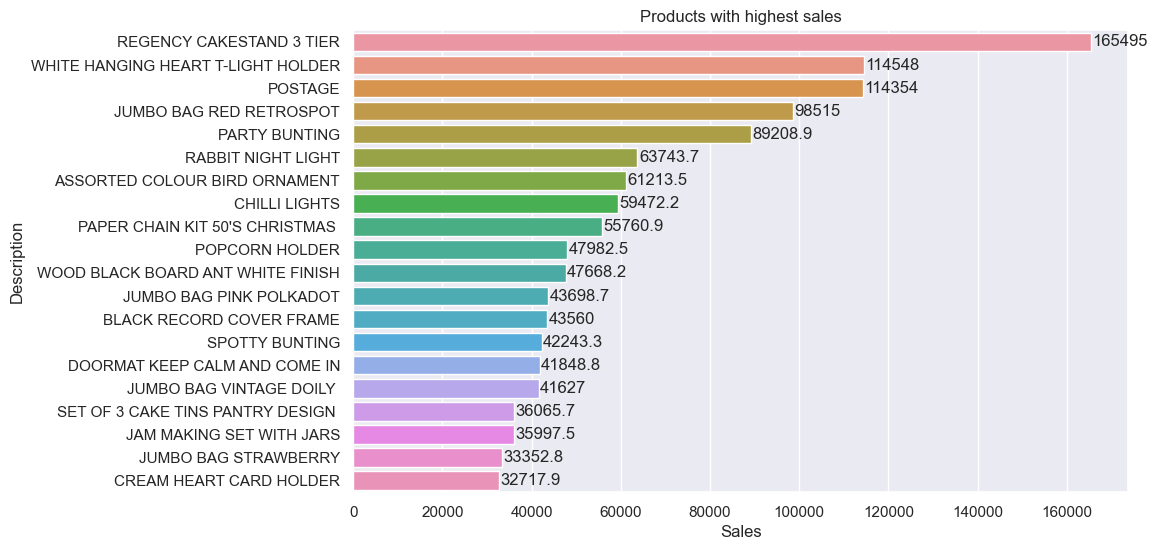

In [262]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(y=pq_df.index, x=pq_df['Sales'])
ax.bar_label(ax.containers[0], padding=1)
plt.title('Products with highest sales')
plt.show();